Objective:
Analyze the dataset containing information about various YouTube channels and
their statistics to extract insights about their performance, popularity, and
characteristics.

Tasks:
1. Basic Data Exploration:
• Load the dataset into a Pandas DataFrame.
• Understand the basic structure of the dataset: number of columns,
rows, missing values, etc.
• Describe the basic statistics for numeric columns.
2. Univariate Analysis:
• Plot a distribution of the number of subscribers.
• Visualize the distribution of video views for the top 100 channels.
• Display the top 10 YouTube categories by the number of channels.
• Plot the distribution of channels based on their creation year.
3. Bivariate Analysis:
• Analyze the relationship between subscribers and video views. Is there
any correlation?
• Compare the average number of subscribers for each category. Which
category has the highest average?
• Investigate how the number of uploads influences the number of
subscribers.
4. Deep Diving with Python:
• Identify and list the top 5 YouTubers who have the highest subscribers
but are not in the 'Music' category.
• Calculate the average number of subscribers for channels created in
each year. How has the average changed over time?
• For the top 100 YouTubers, find out how many have seen an increase in
subscribers over the last 30 days.
5. Conclusions:
• Based on the analysis, which categories seem to be the most popular
on YouTube?
• Does uploading more frequently lead to an increase in subscribers?
• How has the landscape of popular YouTube categories changed over
the years?

In [ ]:
#Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset 

In [4]:
#Loading the dataset
df = pd.read_csv(r"C:\Users\Arkaj\Downloads\Global YouTube Statistics.csv")
df.head()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


In [5]:
df.shape#provides info on no. of rows and columns

(995, 28)

In [6]:
df.info()#prints number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values).

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     995 non-null    int64  
 1   Youtuber                                 995 non-null    object 
 2   subscribers                              995 non-null    int64  
 3   video views                              995 non-null    float64
 4   category                                 949 non-null    object 
 5   Title                                    995 non-null    object 
 6   uploads                                  995 non-null    int64  
 7   Country                                  873 non-null    object 
 8   Abbreviation                             873 non-null    object 
 9   channel_type                             965 non-null    object 
 10  video_views_rank                         994 non-n

# Descriptive statistics

In [36]:
df.describe()#Provids a brief description of each column ( number of unique values,mean,standard deviation,Quartiles for numerical columns).


,rank,subscribers,video views,uploads,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,...,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
count,995.00000,9.950000e+02,9.950000e+02,995.000000,9.940000e+02,879.000000,962.000000,9.390000e+02,995.000000,9.950000e+02,...,9.950000e+02,6.580000e+02,990.000000,990.000000,872.000000,8.720000e+02,872.000000,8.720000e+02,872.000000,872.000000
mean,498.00000,2.298241e+07,1.103954e+10,9187.125628,5.542489e+05,386.053470,745.719335,1.756103e+08,36886.148281,5.898078e+05,...,7.081814e+06,3.490791e+05,2012.630303,15.746465,63.627752,4.303873e+08,9.279278,2.242150e+08,26.632783,-14.128146
std,287.37606,1.752611e+07,1.411084e+10,34151.352254,1.362782e+06,1232.244746,1944.386561,4.163782e+08,71858.724092,1.148622e+06,...,1.379704e+07,6.143554e+05,4.512503,8.777520,26.106893,4.727947e+08,4.888354,1.546874e+08,20.560533,84.760809
min,1.00000,1.230000e+07,0.000000e+00,0.000000,1.000000e+00,1.000000,1.000000,1.000000e+00,0.000000,0.000000e+00,...,0.000000e+00,1.000000e+00,1970.000000,1.000000,7.600000,2.025060e+05,0.750000,3.558800e+04,-38.416097,-172.104629
25%,249.50000,1.450000e+07,4.288145e+09,194.500000,3.230000e+02,11.000000,27.000000,2.013750e+07,2700.000000,4.350000e+04,...,5.217500e+05,1.000000e+05,2009.000000,8.000000,36.300000,8.335541e+07,5.270000,5.590832e+07,20.593684,-95.712891
50%,498.00000,1.770000e+07,7.760820e+09,729.000000,9.155000e+02,51.000000,65.500000,6.408500e+07,13300.000000,2.127000e+05,...,2.600000e+06,2.000000e+05,2013.000000,16.000000,68.000000,3.282395e+08,9.365000,2.706630e+08,37.090240,-51.925280
75%,746.50000,2.460000e+07,1.355470e+10,2667.500000,3.584500e+03,123.000000,139.750000,1.688265e+08,37900.000000,6.068000e+05,...,7.300000e+06,4.000000e+05,2016.000000,23.000000,88.200000,3.282395e+08,14.700000,2.706630e+08,37.090240,78.962880
max,995.00000,2.450000e+08,2.280000e+11,301308.000000,4.057944e+06,7741.000000,7741.000000,6.589000e+09,850900.000000,1.360000e+07,...,1.634000e+08,8.000000e+06,2022.000000,31.000000,113.100000,1.397715e+09,14.720000,8.429340e+08,61.924110,138.252924


In [37]:
df.dtypes#provides info on datatype of each column

rank                                         int64
Youtuber                                    object
subscribers                                  int64
video views                                float64
category                                    object
Title                                       object
uploads                                      int64
Country                                     object
Abbreviation                                object
channel_type                                object
video_views_rank                           float64
country_rank                               float64
channel_type_rank                          float64
video_views_for_the_last_30_days           float64
lowest_monthly_earnings                    float64
highest_monthly_earnings                   float64
lowest_yearly_earnings                     float64
highest_yearly_earnings                    float64
subscribers_for_last_30_days               float64
created_year                   

In [38]:
df.nunique()#shows the no. of unique value for each column

rank                                       995
Youtuber                                   995
subscribers                                289
video views                                988
category                                    18
Title                                      992
uploads                                    777
Country                                     49
Abbreviation                                49
channel_type                                14
video_views_rank                           953
country_rank                               246
channel_type_rank                          286
video_views_for_the_last_30_days           908
lowest_monthly_earnings                    557
highest_monthly_earnings                   736
lowest_yearly_earnings                     757
highest_yearly_earnings                    419
subscribers_for_last_30_days                53
created_year                                19
created_month                               12
created_date 

In [39]:
df.isnull().sum()#provides count of no. null values per column

rank                                         0
Youtuber                                     0
subscribers                                  0
video views                                  0
category                                    46
Title                                        0
uploads                                      0
Country                                    122
Abbreviation                               122
channel_type                                30
video_views_rank                             1
country_rank                               116
channel_type_rank                           33
video_views_for_the_last_30_days            56
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days               337
created_year                                 5
created_month                                5
created_date 

# Univariate Analysis

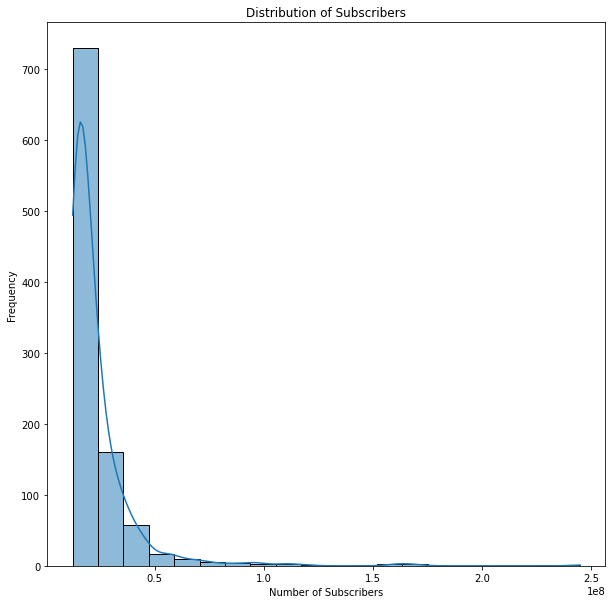

In [40]:
# Plotting a distribution of the number of subscribers
plt.figure(figsize=(10,10))
sns.histplot(df['subscribers'], bins=20, kde=True)
plt.xlabel('Number of Subscribers')
plt.ylabel('Frequency')
plt.title('Distribution of Subscribers')
plt.show()

Interpretations:-

1.The peak in the histogram suggests that there's a common range of subscribers where many YouTube channels fall. The height of the peak indicates the most common number of subscribers.
2.The histogram is skewed to the right (positive skew), it means that there are more channels with fewer subscribers, and only a few with a large number of subscribers.

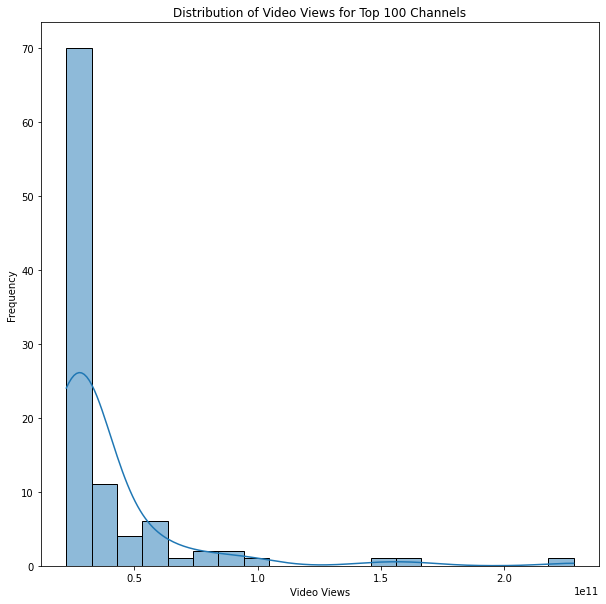

In [9]:
# Visualizing the distribution of video views for the top 100 channels
top_100_views = df.nlargest(100, 'video views')
plt.figure(figsize=(10, 10))
sns.histplot(top_100_views['video views'], bins=20, kde=True)
plt.xlabel('Video Views')
plt.ylabel('Frequency')
plt.title('Distribution of Video Views for Top 100 Channels')
plt.show()


Interpretation:-
1.The peak in the histogram, it suggests that there's a common range of video views where many of the top 100 channels fall. The height of the peak indicates the most common range of video views among these channels which is less than 50 billion for 70 channels in top 100.
2.The histogram is skewed to the right (positive skew), it means that there are more channels with less video views in the top 100 when compared to a few channels getting a good chunk of video views.

In [11]:
# Displaying the top 10 YouTube categories by the number of channels
top_categories = df['category'].value_counts().head(10)
print(top_categories)


Entertainment           241
Music                   202
People & Blogs          132
Gaming                   94
Comedy                   69
Film & Animation         46
Education                45
Howto & Style            40
News & Politics          26
Science & Technology     17
Name: category, dtype: int64


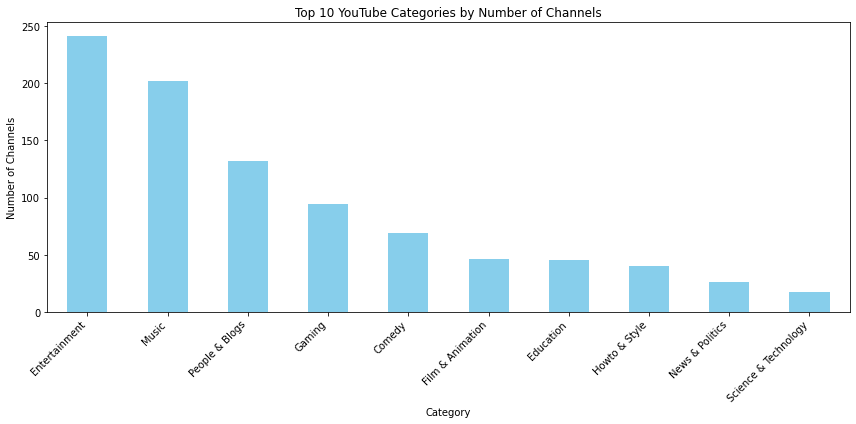

In [43]:
plt.figure(figsize=(12, 6))
top_categories.plot(kind='bar', color='skyblue')
plt.xlabel('Category')
plt.ylabel('Number of Channels')
plt.title('Top 10 YouTube Categories by Number of Channels')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

Interpretation:-
1.From the bar chart we can visualize the top 10 categories popular in Youtube by number of channels
2.We can see Entertainment being the most popular category with 241 channels ,followed by music and people and blogs.
3.But,it is also evident that least popular category is science and technology.

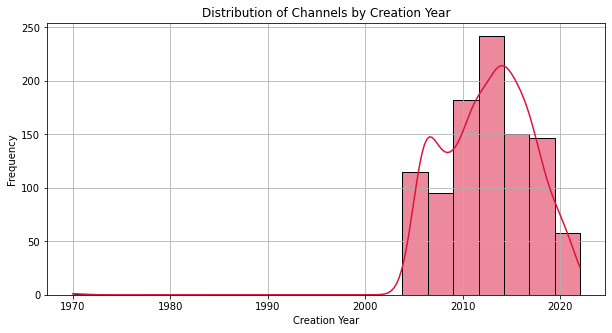

In [21]:
plt.figure(figsize=(10, 5))
sns.histplot(df['created_year'], bins=20, color='crimson', kde=True)
plt.xlabel('Creation Year')
plt.ylabel('Frequency')
plt.title('Distribution of Channels by Creation Year')
plt.grid(True)
plt.show()

Interpretation-

1.As it is evident that the histogram is left skewed which indicates that more yotube channels are being created now compared to the time before the year 2000.

2.It is also noticable that the creation of new channels took a dip after the year 2005 but the figures started rising again within a few years,with most number of channels created between 2010 to 2015.

# Bivariate Analysis

Correlation between Subscribers and Video Views: 0.7509576173780217


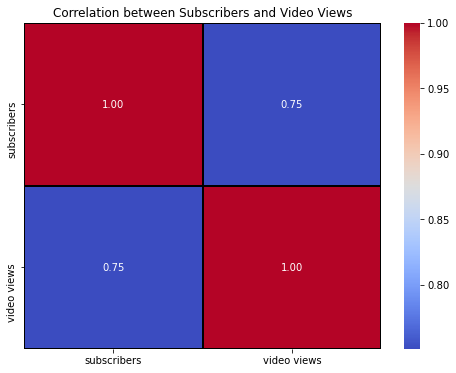

In [35]:
# Analyzing the relationship between subscribers and video views (correlation)
correlation = df['subscribers'].corr(df['video views'])
print(f'Correlation between Subscribers and Video Views: {correlation}')
correlation_matrix = df[['subscribers', 'video views']].corr()

# Creating a heatmap to visualize the correlation
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1, linecolor='black')
plt.title('Correlation between Subscribers and Video Views')
plt.show()

Interpretation:-
 
As the correlation function and the heatmap both suggest very strong positive correlation between the two variables,which implies subscribers increase with increase in video views and vice versa.

category
Shows                    4.161538e+07
Trailers                 3.900000e+07
Film & Animation         2.858478e+07
Nonprofits & Activism    2.775000e+07
Sports                   2.710909e+07
Education                2.654222e+07
Music                    2.571782e+07
Movies                   2.565000e+07
Entertainment            2.140332e+07
People & Blogs           2.105606e+07
Gaming                   2.085213e+07
News & Politics          2.063077e+07
Comedy                   2.012319e+07
Howto & Style            1.939000e+07
Science & Technology     1.861765e+07
Pets & Animals           1.810000e+07
Autos & Vehicles         1.785000e+07
Travel & Events          1.250000e+07
Name: subscribers, dtype: float64


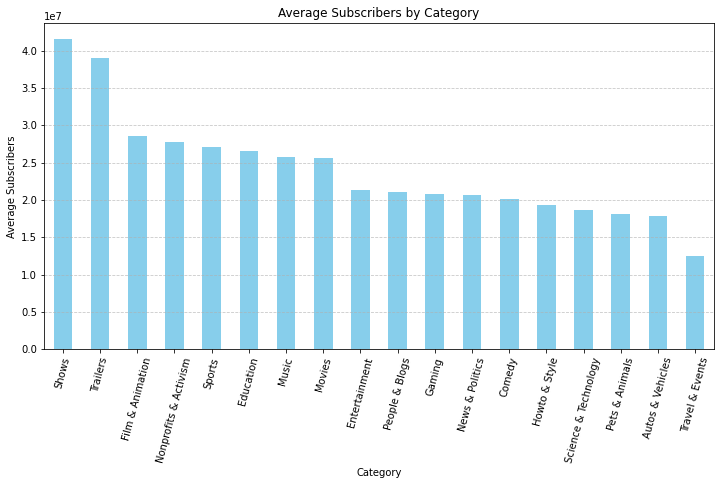

In [25]:
# Comparing the average number of subscribers for each category
average_subscribers_by_category = df.groupby('category')['subscribers'].mean().sort_values(ascending=False)
print(average_subscribers_by_category)
plt.figure(figsize=(12, 6))
average_subscribers_by_category.plot(kind='bar', color='skyblue')
plt.xlabel('Category')
plt.ylabel('Average Subscribers')
plt.title('Average Subscribers by Category')
plt.xticks(rotation=75)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Interpretation:-

1.It is evident from bar graph that 'shows' category has the highest number of average subscribers of 4M+ ,followed by 'Trailers' category with slightly less of 3.8+M average subscribers and, 'Film and animation' category with slightly less than 3M average subscribers.

2.It is also seen that 'Travel and events 'category has the lowest average subscribers with around 1.2M.

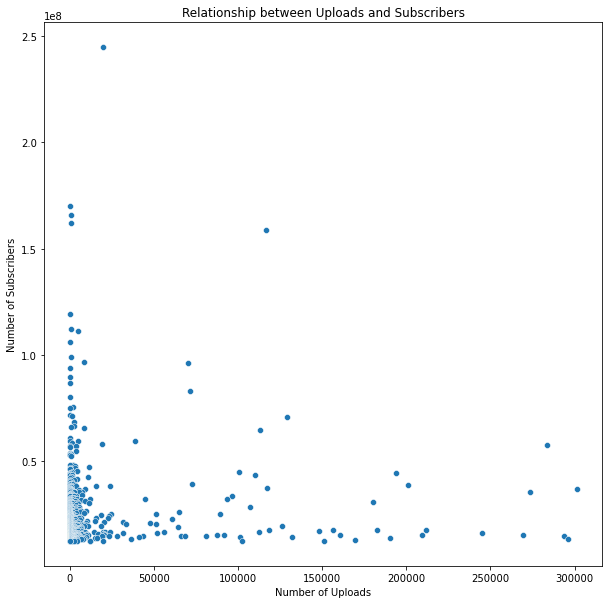

In [27]:

# Investigating how the number of uploads influences the number of subscribers
plt.figure(figsize=(10, 10))
sns.scatterplot(x='uploads', y='subscribers', data=df)
plt.xlabel('Number of Uploads')
plt.ylabel('Number of Subscribers')
plt.title('Relationship between Uploads and Subscribers')
plt.show()


Interpretation:- 

1.It is evident from the above scatterplot that 'subscribers' and 'uploads' have a positive correlation.

2.Outliers in the scatterplot, which imply channels that deviate significantly from the general trend, may represent exceptional cases with either a very high number of subscribers or uploads.

In [30]:
#df.head(10)

# Deep Diving with Python

                     Youtuber  subscribers
1              YouTube Movies    170000000
2                     MrBeast    166000000
3  Cocomelon - Nursery Rhymes    162000000
4                   SET India    159000000
5                       Music    119000000


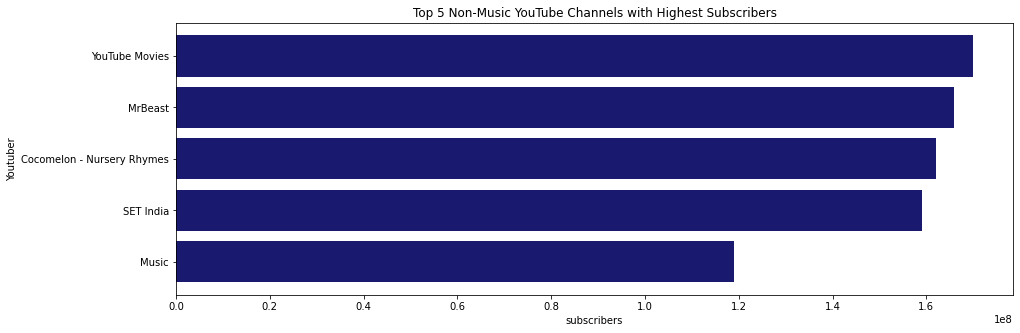

In [49]:
# Identifying and listing the top 5 YouTubers with the highest subscribers but not in the 'Music' category
top_5_non_music = df[df['category'] != 'Music'].nlargest(5, 'subscribers')
print(top_5_non_music[['Youtuber', 'subscribers']])
plt.figure(figsize=(15, 5))
plt.barh(top_5_non_music['Youtuber'], top_5_non_music['subscribers'], color='midnightblue')
plt.xlabel('subscribers')
plt.ylabel('Youtuber')
plt.title('Top 5 Non-Music YouTube Channels with Highest Subscribers')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest subscribers at the top
plt.show()

Since no category was mentioned for the channel 'Music' in the dataset ,it showed up in the result.We will thus impute the category for the channel 'Music'  with music.

In [50]:
df.loc[df['Youtuber'] == 'Music', 'category'] = 'Music'
df.head(10)

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
5,6,Music,119000000,0.000000e+00,Music,Music,0,NaN,NaN,Music,...,NaN,2013.0,Sep,24.0,NaN,NaN,NaN,NaN,NaN,NaN
6,7,��� Kids Diana Show,112000000,9.324704e+10,People & Blogs,��� Kids Diana Show,1111,United States,US,Entertainment,...,NaN,2015.0,May,12.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
7,8,PewDiePie,111000000,2.905804e+10,Gaming,PewDiePie,4716,Japan,JP,Entertainment,...,NaN,2010.0,Apr,29.0,63.2,1.262266e+08,2.29,115782416.0,36.204824,138.252924
8,9,Like Nastya,106000000,9.047906e+10,People & Blogs,Like Nastya Vlog,493,Russia,RU,People,...,100000.0,2016.0,Jan,14.0,81.9,1.443735e+08,4.59,107683889.0,61.524010,105.318756
9,10,Vlad and Niki,98900000,7.718017e+10,Entertainment,Vlad and Niki,574,United States,US,Entertainment,...,600000.0,2018.0,Apr,23.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891


                     Youtuber  subscribers
1              YouTube Movies    170000000
2                     MrBeast    166000000
3  Cocomelon - Nursery Rhymes    162000000
4                   SET India    159000000
6         ��� Kids Diana Show    112000000


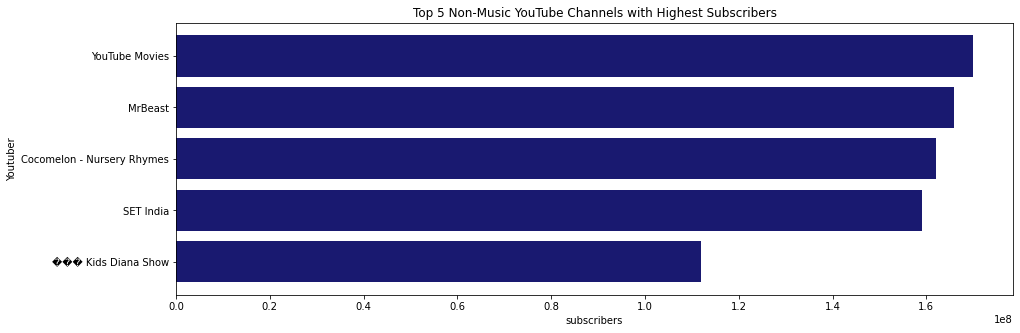

In [51]:
# Identify and list the top 5 YouTubers with the highest subscribers but not in the 'Music' category
top_5_non_music = df[df['category'] != 'Music'].nlargest(5, 'subscribers')
print(top_5_non_music[['Youtuber', 'subscribers']])
plt.figure(figsize=(15, 5))
plt.barh(top_5_non_music['Youtuber'], top_5_non_music['subscribers'], color='midnightblue')
plt.xlabel('subscribers')
plt.ylabel('Youtuber')
plt.title('Top 5 Non-Music YouTube Channels with Highest Subscribers')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest subscribers at the top
plt.show()

Interpretation:-

This visualization helps us to Identify and list the top 5 YouTubers who have the highest subscribers
but are not in the 'Music' category with Youtube movies in the top having 170M subscribers.

In [38]:
# Grouping by creation year and calculating average subscribers
time_analysis = df.groupby('created_year').agg({
    'subscribers': 'mean'
})
time_analysis

,subscribers
created_year,
1970.0,3.630000e+07
2005.0,2.582917e+07
2006.0,3.188462e+07
2007.0,2.490204e+07
2008.0,2.365217e+07
2009.0,2.310577e+07
2010.0,2.067083e+07
2011.0,2.180000e+07
2012.0,2.403824e+07


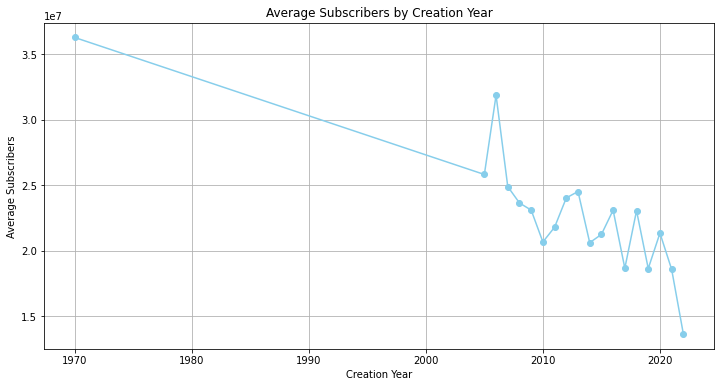

In [39]:
# Displaying the result
plt.figure(figsize=(12, 6))
plt.plot(time_analysis.index, time_analysis['subscribers'], marker='o', color='skyblue')
plt.xlabel('Creation Year')
plt.ylabel('Average Subscribers')
plt.title('Average Subscribers by Creation Year')
plt.grid(True)
plt.show()

As we can see from the above that the average subscriber for channels decreased as years progressed,which provides us further insights about the large number of channels created every day as we move further ahead in time bringing down the average significantly.

Number of top 100 YouTubers with an increase in subscribers: 78


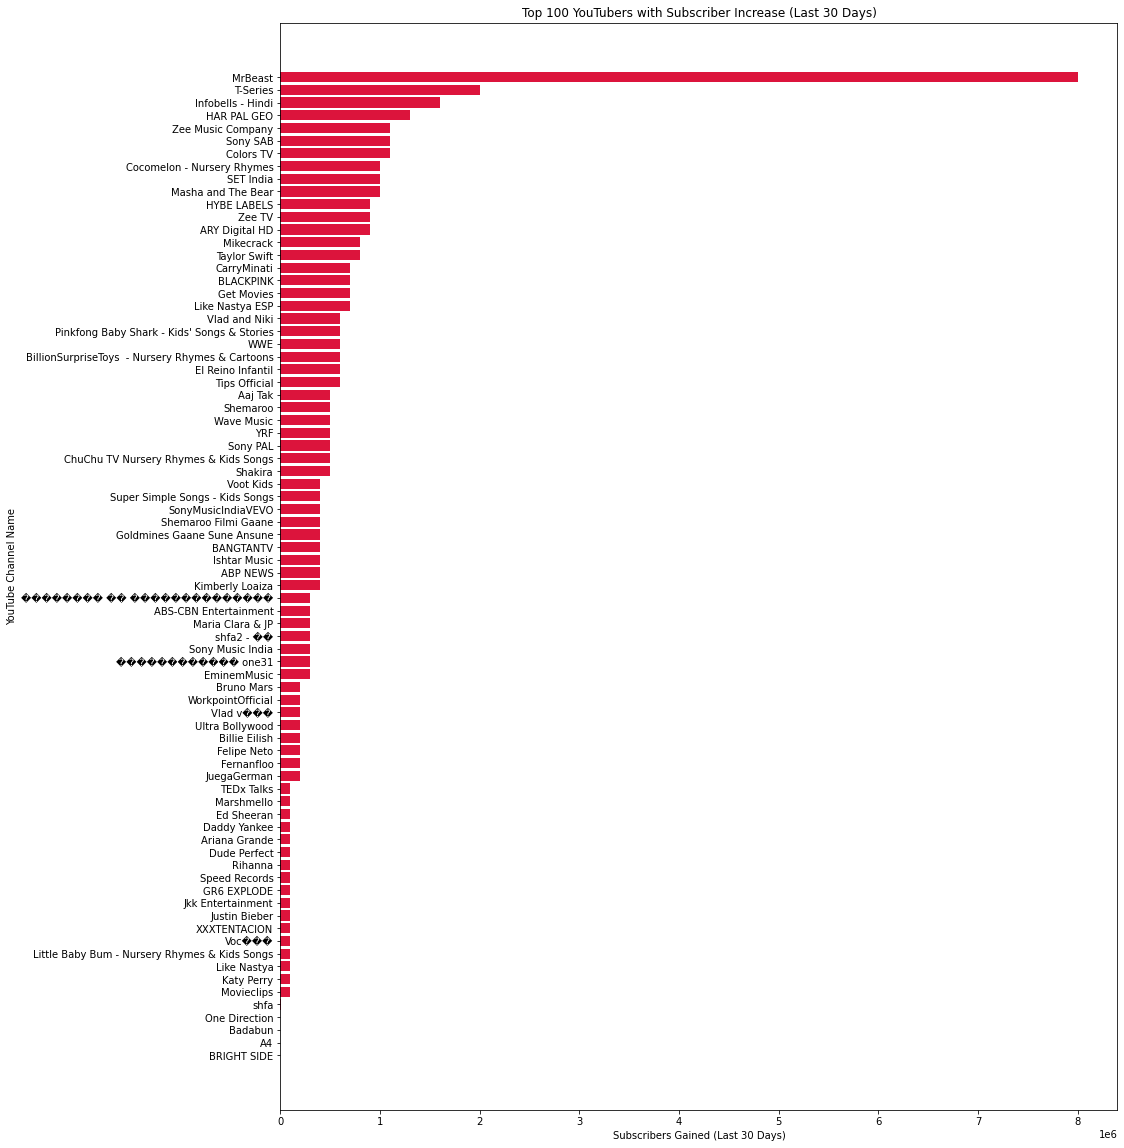

In [53]:
# For the top 100 YouTubers, we find out how many have seen an increase in subscribers over the last 30 days
top_100 = df.nlargest(100, 'subscribers')
increase_in_subscribers = top_100[top_100['subscribers_for_last_30_days'] > 0]
print(f'Number of top 100 YouTubers with an increase in subscribers: {len(increase_in_subscribers)}')
# Sort the filtered DataFrame by 'Subscribers gained' in descending order
increase_in_subscribers = increase_in_subscribers.sort_values('subscribers_for_last_30_days', ascending=False)

# Creating a horizontal bar chart to display the names and subscriber increase
plt.figure(figsize=(15, 20))
plt.barh(increase_in_subscribers['Youtuber'], increase_in_subscribers['subscribers_for_last_30_days'], color='crimson')
plt.xlabel('Subscribers Gained (Last 30 Days)')
plt.ylabel('YouTube Channel Name')
plt.title('Top 100 YouTubers with Subscriber Increase (Last 30 Days)')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest gain at the top
plt.show()

Interpretation:-
As it is evident from the above bar chart only 78 out of top 100 youtubers saw an increase in subscriber over the last 30 days,with Mr Beast having the most number of subscriber increase over the last 30 days.

# Conclusion

Based on the analysis, which categories seem to be the most popular
on YouTube?

From our analysis,

1.Based on number of channels,it is:-

Entertainment   

Music

People & Blogs   

Gaming     

Comedy           

Film & Animation   

Education        

Howto & Style

News & Politics    

Science & Technology     

2.Based on average number of subscribers they are:-

Shows

Trailers 

Film & Animation 
                        
Nonprofits & Activism   

Sports   

Education 

Music   

Movies 

Entertainment  

People & Blogs  

Gaming     

News & Politics   

Comedy       

Howto & Style  

Science & Technology   

Pets & Animals       

Autos & Vehicles   

Travel & Events  

Does uploading more frequently lead to an increase in subscribers?

Yes from our previous analysis in the scatterplot it is evident  that 'subscribers' and 'uploads' have a positive correlation,which implies subscribers increase with an increase in uploads and vice-versa.

How has the landscape of popular YouTube categories changed over
the years?



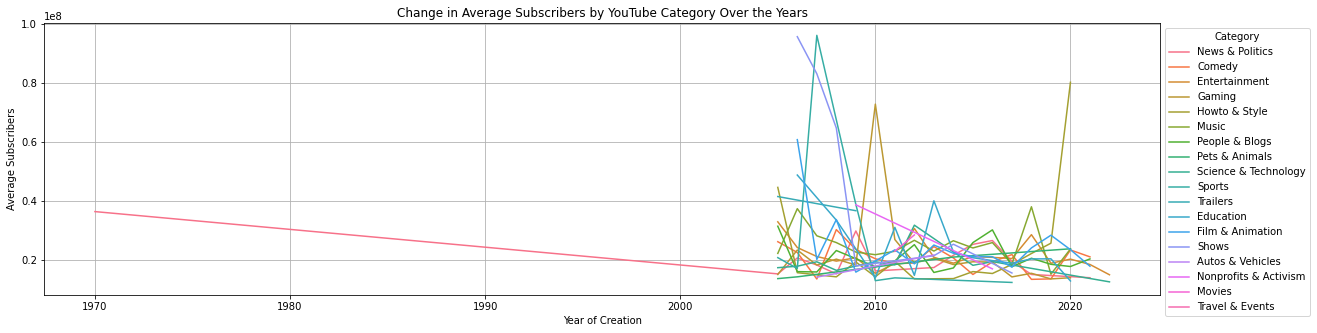

In [34]:
category_yearly_avg = df.groupby(['created_year', 'category'])['subscribers'].mean().reset_index()

# Create a line chart to show how average subscribers in each category have changed over the years
plt.figure(figsize=(20, 5))
sns.lineplot(x='created_year', y='subscribers', hue='category', data=category_yearly_avg)
plt.xlabel('Year of Creation')
plt.ylabel('Average Subscribers')
plt.title('Change in Average Subscribers by YouTube Category Over the Years')
plt.legend(title='Category', loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

The above lineplot perfectly depicts how the landscape of youtube categories changed over the years.